In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Mall_Customers.csv')

print("First DataFrame (df) head:")
display(df.head())



First DataFrame (df) head:


,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
df.drop(['CustomerID'],axis=1,inplace=True, errors='ignore')

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [64]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=11,min_samples=4, metric = 'euclidean')
db.fit(df)

DBSCAN(eps=11, min_samples=4)

In [65]:
db.labels_

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0,  2,  0,  2,  0,  1, -1,  1,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  3,  0,  3, -1,  3,  5,  3, -1,  3,  4,  3,
        5,  3,  4,  3, -1,  3, -1,  3,  4,  3, -1,  3,  5,  3,  5,  3,  5,
        3,  5,  3,  5,  3, -1,  3, -1,  3,  4,  3,  5,  3,  5,  3,  5, -1,
        5,  3,  5,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

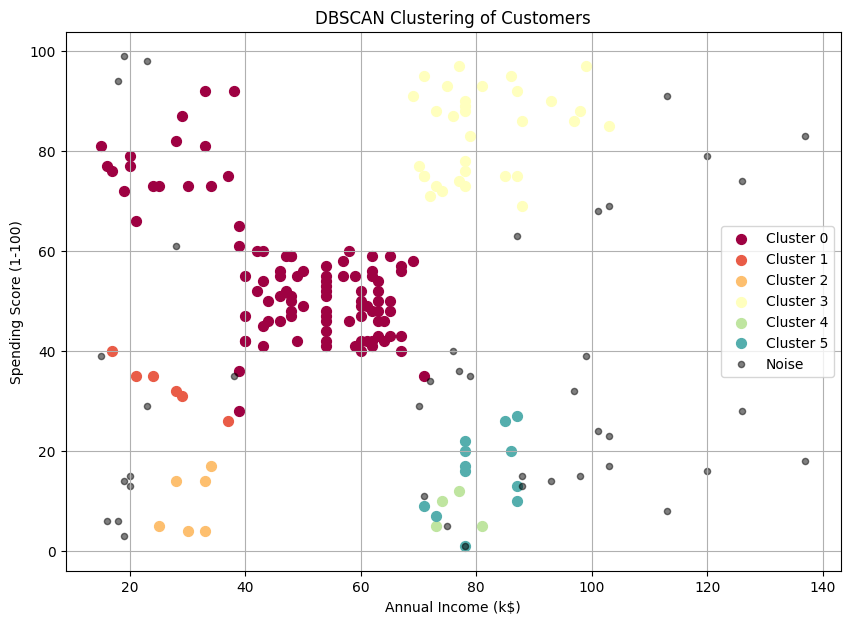

In [66]:
import matplotlib.pyplot as plt
df['cluster'] = db.labels_
unique_labels = set(db.labels_)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 7))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (df['cluster'] == k)
    xy = df[class_member_mask]

    if k == -1:
        plt.scatter(xy['Annual_Income_(k$)'], xy['Spending_Score'], s=20, c=[col], marker='o', alpha=0.5, label='Noise')
    else:
        plt.scatter(xy['Annual_Income_(k$)'], xy['Spending_Score'], s=50, c=[col], marker='o', label=f'Cluster {k}')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()